In [30]:
__name__

'__main__'

In [31]:
from pathlib import Path
import sys
import os
path_root = Path(os.getcwd()).parents[1]
sys.path.append(str(path_root))

In [32]:
sys.path

['/home/steph/workspace/recipe-generator/models/notebooks/training-evaluation',
 '/home/steph/.conda/envs/recipes/lib/python310.zip',
 '/home/steph/.conda/envs/recipes/lib/python3.10',
 '/home/steph/.conda/envs/recipes/lib/python3.10/lib-dynload',
 '',
 '/home/steph/.local/lib/python3.10/site-packages',
 '/home/steph/.conda/envs/recipes/lib/python3.10/site-packages',
 '/home/steph/workspace/recipe-generator/models',
 '/home/steph/workspace/recipe-generator/models']

In [33]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [34]:
with open('../../outputs/gpt/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

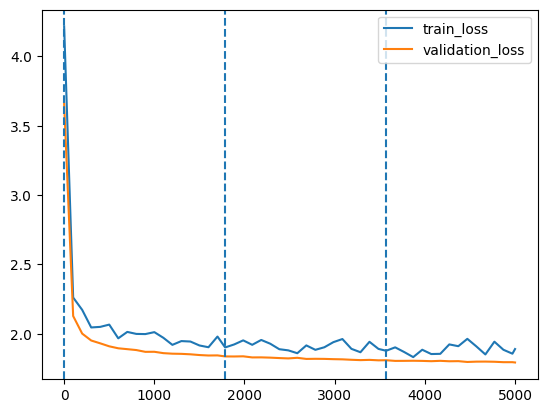

In [35]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

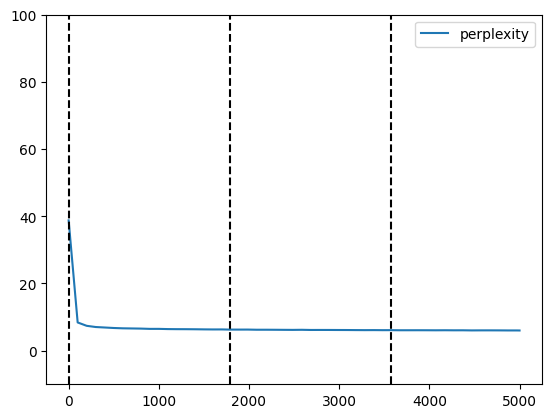

In [36]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

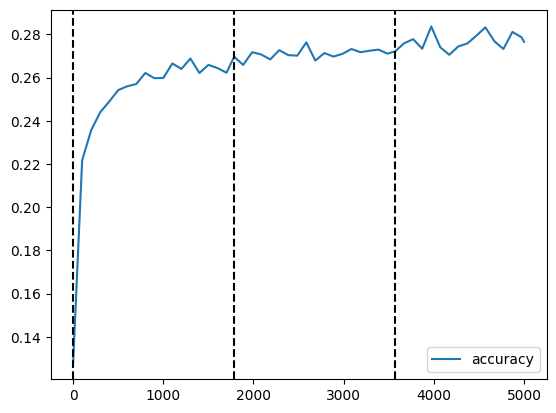

In [37]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [38]:
min([m['validation_loss'] for m in training_metrics])

1.7932370901107788

# Final Evaluation Outputs

In [39]:
food_names = np.load('../../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1110,)

In [40]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [41]:
pd.set_option('max_colwidth', None)

In [42]:
input[1].shape

torch.Size([1000, 13])

In [43]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'label': food_names[input[1]].tolist(),
    'prediction': food_names[output.argmax(2)].tolist(), 
})

,input,label,prediction
0,"[gelatin, water, yogurt, sugar, vanilla, cardamom, sweet orange, cinnamon, <end>, <pad>, <pad>, <pad>, <pad>]","[water, yogurt, sugar, vanilla, cardamom, sweet orange, cinnamon, <end>, <pad>, <pad>, <pad>, <pad>, <pad>]","[water, sugar, topping, vanilla, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>]"
1,"[egg roll, sugar, pudding, cinnamon, margarine, nut, <end>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[sugar, pudding, cinnamon, margarine, nut, <end>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[cheese, cinnamon, cinnamon, pecan nut, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>]"
2,"[cracker, butter, sugar, flour, sauce, water, cocoa powder, salt, potato chip, marshmallow, <end>, <pad>, <pad>]","[butter, sugar, flour, sauce, water, cocoa powder, salt, potato chip, marshmallow, <end>, <pad>, <pad>, <pad>]","[sugar, sugar, cheese, egg, cream, cream, cream, egg, <end>, <end>, <end>, <end>, <end>]"
3,"[coffee, almond, curry powder, sugar substitute, <end>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[almond, curry powder, sugar substitute, <end>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[sugar, sugar, sugar, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>]"
4,"[pie crust, spinach, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, pepper, parsley, <end>, <pad>]","[spinach, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, pepper, parsley, <end>, <pad>, <pad>]","[cheese, cheese, cheese, cheese, cheese, cheese, <end>, <end>, pepper, <end>, <end>, <end>, <end>]"
...,...,...,...
995,"[meat bouillon, onion-family vegetable, green turtle, sauce, garlic, green bean, rice, cheese, tortilla, <end>, <pad>, <pad>, <pad>]","[onion-family vegetable, green turtle, sauce, garlic, green bean, rice, cheese, tortilla, <end>, <pad>, <pad>, <pad>, <pad>]","[onion-family vegetable, garlic, garden tomato, <end>, curry powder, corn, <end>, <end>, <end>, <end>, <end>, <end>, <end>]"
996,"[chicken, sauce, walnut, sweet orange, <unknown>, <end>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[sauce, walnut, sweet orange, <unknown>, <end>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[onion-family vegetable, cheese, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>, <end>]"
997,"[egg, cream, buttermilk, honey, curry powder, water, salt, flour, butter, vanilla, domestic pig, syrup, <end>]","[cream, buttermilk, honey, curry powder, water, salt, flour, butter, vanilla, domestic pig, syrup, <end>, <pad>]","[sugar, sugar, sugar, flour, salt, salt, flour, <end>, <end>, <end>, <end>, <end>, <end>]"
998,"[butter, flour, curry powder, salt, sugar, egg, vanilla, milk cow, chocolate, <end>, <pad>, <pad>, <pad>]","[flour, curry powder, salt, sugar, egg, vanilla, milk cow, chocolate, <end>, <pad>, <pad>, <pad>, <pad>]","[sugar, sugar, salt, sugar, egg, vanilla, milk cow, <end>, <end>, <end>, <end>, <end>, <end>]"


This way of evaluating the model is wrong. There are repeated predicted tokens here because it is predicting from the input, and the most probable token hasn't yet appeared in the input.

We need to evaluate the model by simply looking at generations that it does.

In [44]:
model = torch.load('../../outputs/gpt/model.pt').to('cuda')
model.eval();

In [54]:
np.argwhere(food_names=='chicken')

array([[418]])

In [58]:
context = (torch.ones((5,1), dtype=torch.long)*418).to('cuda')
context

tensor([[418],
        [418],
        [418],
        [418],
        [418]], device='cuda:0')

In [61]:
generations = model.generate(context, 14).to('cpu')
food_names[generations]

array([['chicken', '<end>', 'salad dressing', 'pepper',
        'onion-family vegetable', 'celery stalk', 'grape', '<end>',
        'oval-leaf huckleberry', '<end>', 'pineapple', 'walnut', '<end>',
        '<end>', 'carrot'],
       ['chicken', 'potato', 'carrot', 'evaporated milk', 'celery stalk',
        'egg', 'salt', 'pepper', '<end>', 'pea shoot', 'buttermilk',
        '<end>', 'sauce', '<end>', '<end>'],
       ['chicken', 'pineapple', 'apple', 'pepper', 'black raisin',
        'green onion', 'walnut', 'salad dressing', '<end>', '<end>',
        'lettuce', '<end>', 'oval-leaf huckleberry', '<end>', '<end>'],
       ['chicken', 'mushroom', 'salad dressing', 'soup', 'sherry',
        'milk cow', 'cheese', 'almond', '<end>', '<end>', '<end>',
        'bread', '<end>', '<end>', '<end>'],
       ['chicken', 'american cranberry', 'curry powder', 'butter',
        '<end>', '<end>', '<end>', 'dill', 'pea shoot', '<end>', '<end>',
        'garlic', '<end>', '<unknown>', 'pepper']], dtype=